# Analysis of Video and Image Data for cropping and texture features
Author(s): Miguel Xochicale @mxochicale    
Contributor(s): Sujon Hekim

## History
* 17th May 2022: Add prototype

## Summary


### How to run the notebook
1. Go to repository path: `$HOME/repositories/`
Open repo in pycharm and in the terminal type:
```
git checkout main # or the branch
git pull # to bring a local branch up-to-date with its remote version
```

2. Launch Notebook server. Go to you repository path: cd $HOME/repositories/ and type in the pycharm terminal:
```
mamba activate *VE 
jupyter notebook --browser=firefox
```
which will open your web-browser.

## References 
1. https://stackoverflow.com/questions/45704999/how-to-convert-vector-wrapped-as-string-to-numpy-array-in-pandas-dataframe
2. https://github.com/YuxinZhaozyx/pytorch-VideoDataset/blob/master/datasets.py (Future work)
3. https://stackoverflow.com/questions/65446464/how-to-convert-a-video-in-numpy-array
4. https://matplotlib.org/stable/gallery/specialty_plots/mri_with_eeg.html#sphx-glr-gallery-specialty-plots-mri-with-eeg-py 
5. https://www.researchgate.net/publication/326881329_Medical_image_security_enhancement_using_two_dimensional_chaotic_mapping_optimized_by_self-adaptive_grey_wolf_algorithm 

    

## Setting imports and datasets paths

In [2]:
from rtt4ssa.utils.utils import video_to_tensor, compute_texture_array_and_plot
from rtt4ssa.utils.utils import get_and_plot_data_frame_of_texture_analysis
from rtt4ssa.utils.utils import get_and_plot_imu_data_analysis

import os
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import skimage
from typing import Tuple, List

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]
REPOSITORY_PATH='repositories/in2research2023'

###########################
###SET DATA_PATH 
# DATA_PATH='scripts/sensor-fusion'
DATA_PATH='repositories/datasets/in2research2023/Thu-27-Jul-2023'


FULL_REPO_DATA_PATH = HOME_PATH +'/' + DATA_PATH
print(FULL_REPO_DATA_PATH)

## Printing Versions and paths
print(f'PyTorch Version: {torch.__version__}')
print(f'pandas Version: {pd.__version__}')
print(f'numpy Version: {np.__version__}')
print(f'cv2 Version: {cv2.__version__}')
print(f'skimage Version: {skimage.__version__}')

# ###########################
# ### experiments_13-Jul-2023
# AVI_FILE_01 = 'test01.avi'
# CSV_FILE_01 = 'test01.avi.csv'
# FULL_PATH_AND_AVI_FILE_01 = os.path.join(FULL_REPO_DATA_PATH , AVI_FILE_01)
# FULL_PATH_AND_CSV_FILE_01 = os.path.join(FULL_REPO_DATA_PATH , CSV_FILE_01)
# print(f'FULL_REPO_DATA_PATH: {FULL_REPO_DATA_PATH}')
# print(f'FULL_PATH_AND_CSV_FILE: {FULL_PATH_AND_CSV_FILE_01}')
# print(f'FULL_PATH_AND_AVI_FILE: {FULL_PATH_AND_AVI_FILE_01}')

/home/compass00/repositories/datasets/in2research2023/Thu-27-Jul-2023
PyTorch Version: 2.0.0.post200
pandas Version: 2.0.3
numpy Version: 1.24.3
cv2 Version: 4.8.0
skimage Version: 0.21.0


# Reading video and plotting frames

In [4]:
FULL_PATH_AND_AVI_FILE = os.path.join(FULL_REPO_DATA_PATH, 'participant01/participant01-test01.avi')
FULL_PATH_AND_CSV_FILE = os.path.join(FULL_REPO_DATA_PATH, 'participant01/participant01-test01.avi.csv')



start_frame_number = 000
end_frame_number = 1000
total_number_of_frames = end_frame_number - start_frame_number


video, frames_timestam = video_to_tensor(FULL_PATH_AND_AVI_FILE, start_frame_number, end_frame_number)

num_frames, height, width = video.shape
print(f'num_frames: {num_frames}')
print(f'height: {height}')
print(f'width: {width}')


  
  
  VIDEO_FEATURES
    video_name=/home/compass00/repositories/datasets/in2research2023/Thu-27-Jul-2023/participant01/participant01-test01.avi
    Frame_height=480, frame_width=640 fps=120 nframes=6661 
  
  
num_frames: 999
height: 480
width: 640


# Generating texture_analysis_array and plotting frames and histograms

frame_i: 0, timestamp 00:00:0.000


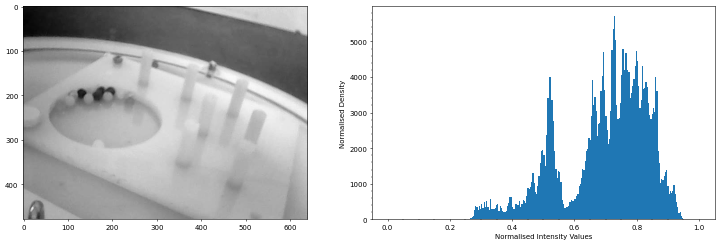

frame_i: 500, timestamp 00:04:166.667


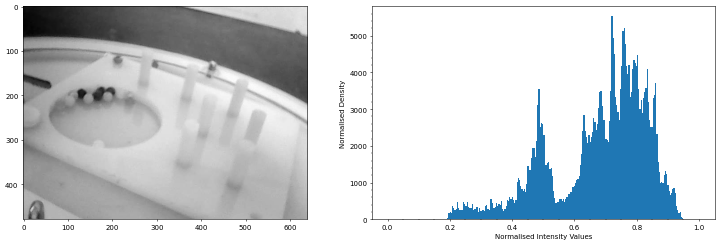

In [5]:
display_factor = 500    
texture_analysis_array = compute_texture_array_and_plot(video, frames_timestam, display_factor)


# Plotting texture analysis of all frames in the video

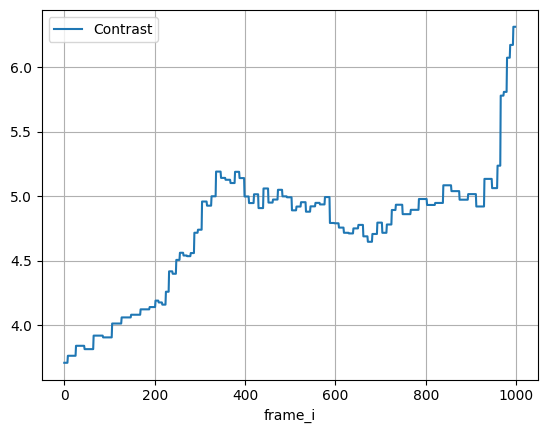

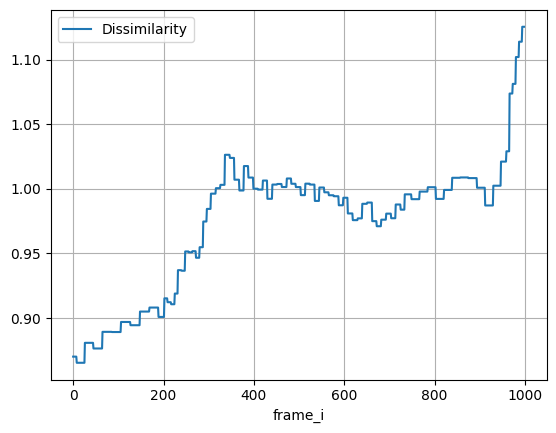

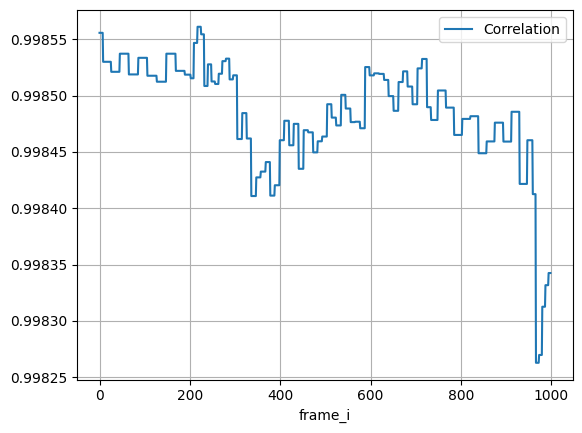

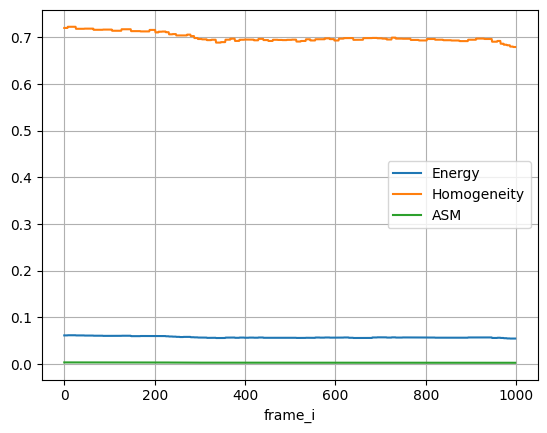

In [6]:

df_texture_analysis = get_and_plot_data_frame_of_texture_analysis(texture_analysis_array, total_number_of_frames)


In [7]:
print(df_texture_analysis)


     frame_i  Contrast  Correlation  Dissimilarity    Energy  Homogeneity  \
0          0  3.709497     0.998556       0.870243  0.061662     0.720009   
1          1  3.709497     0.998556       0.870243  0.061662     0.720009   
2          2  3.709497     0.998556       0.870243  0.061662     0.720009   
3          3  3.709497     0.998556       0.870243  0.061662     0.720009   
4          4  3.709497     0.998556       0.870243  0.061662     0.720009   
..       ...       ...          ...            ...       ...          ...   
994      994  6.315235     0.998342       1.125323  0.054912     0.679207   
995      995  6.315235     0.998342       1.125323  0.054912     0.679207   
996      996  6.315235     0.998342       1.125323  0.054912     0.679207   
997      997  6.315235     0.998342       1.125323  0.054912     0.679207   
998      998  6.315235     0.998342       1.125323  0.054912     0.679207   

          ASM  
0    0.003802  
1    0.003802  
2    0.003802  
3    0.0038

## Reading and ploting csv files

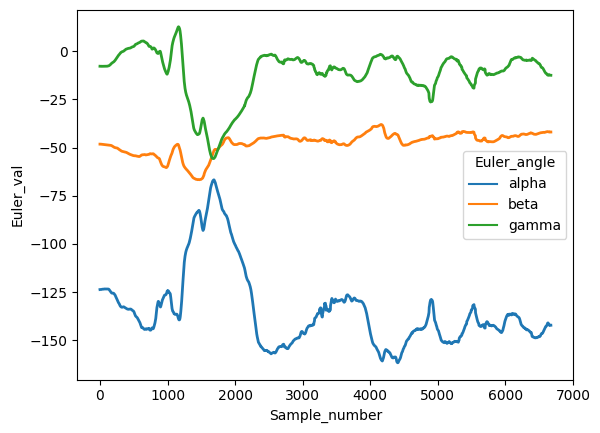

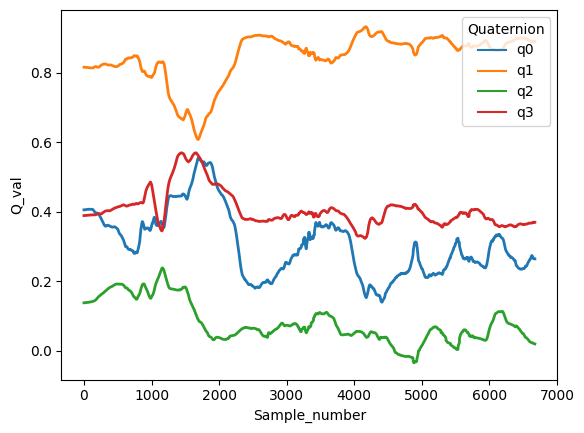

In [8]:
    df, ndf, nqdf = get_and_plot_imu_data_analysis(FULL_PATH_AND_CSV_FILE)
    

In [9]:
ndf

,Sample_number,Euler_angle,Euler_val
0,0,alpha,-123.669846
1,1,alpha,-123.643318
2,2,alpha,-123.647362
3,3,alpha,-123.650116
4,4,alpha,-123.653297
...,...,...,...
20017,6669,gamma,-12.480175
20018,6670,gamma,-12.492888
20019,6671,gamma,-12.499659
20020,6672,gamma,-12.498528


In [10]:
nqdf

,Sample_number,Quaternion,Q_val
0,0,q0,0.405282
1,1,q0,0.405396
2,2,q0,0.405379
3,3,q0,0.405363
4,4,q0,0.405348
...,...,...,...
26691,6669,q3,0.369556
26692,6670,q3,0.369566
26693,6671,q3,0.369559
26694,6672,q3,0.369536


In [11]:
df

,Sample_number,epoch machine time (ns),Timestamp for frame capture.read (ns),Timestamp LPMSB2 (s),Quaternions_LPMSB2,Euler_LPMSB2,A,B,C,q0,q1,q2,q3
0,0,1690461837761090837,1690461837761729494,506.995,"[0.40528151392936707, 0.8159356713294983, 0.13...","[-123.66984558105469, -48.22586441040039, -7.8...",-123.669846,-48.225864,-7.814958,0.405282,0.815936,0.137552,0.388684
1,1,1690461837827011495,1690461837761729494,507.000,"[0.40539586544036865, 0.8158341646194458, 0.13...","[-123.64331817626953, -48.23521041870117, -7.8...",-123.643318,-48.235210,-7.830998,0.405396,0.815834,0.137565,0.388773
2,2,1690461837832152682,1690461837761729494,507.005,"[0.40537869930267334, 0.815849781036377, 0.137...","[-123.6473617553711, -48.23371505737305, -7.82...",-123.647362,-48.233715,-7.828511,0.405379,0.815850,0.137563,0.388759
3,3,1690461837838857114,1690461837761729494,507.010,"[0.4053632616996765, 0.8158608675003052, 0.137...","[-123.65011596679688, -48.23297119140625, -7.8...",-123.650116,-48.232971,-7.827770,0.405363,0.815861,0.137556,0.388755
4,4,1690461837844681570,1690461837761729494,507.015,"[0.40534812211990356, 0.8158745765686035, 0.13...","[-123.6532974243164, -48.23155975341797, -7.82...",-123.653297,-48.231560,-7.826445,0.405348,0.815875,0.137549,0.388744
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,6669,1690461900370005608,1690461900349992694,543.750,"[0.26408863067626953, 0.8906802535057068, 0.01...","[-142.16842651367188, -41.9541015625, -12.4801...",-142.168427,-41.954102,-12.480175,0.264089,0.890680,0.019356,0.369556
6670,6670,1690461900379744328,1690461900349992694,543.755,"[0.26415497064590454, 0.8906576037406921, 0.01...","[-142.15513610839844, -41.951904296875, -12.49...",-142.155136,-41.951904,-12.492888,0.264155,0.890658,0.019294,0.369566
6671,6671,1690461900391418020,1690461900349992694,543.760,"[0.26414617896080017, 0.890664279460907, 0.019...","[-142.15415954589844, -41.94894027709961, -12....",-142.154160,-41.948940,-12.499659,0.264146,0.890664,0.019235,0.369559
6672,6672,1690461900402127872,1690461900349992694,543.765,"[0.2640404999256134, 0.8907061219215393, 0.019...","[-142.1689453125, -41.94593811035156, -12.4985...",-142.168945,-41.945938,-12.498528,0.264040,0.890706,0.019188,0.369536
